In [1]:
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
from skimage.filters.rank import entropy
from skimage.morphology import disk
from matplotlib import pyplot as plt
from skimage import io
from skimage.filters import sobel
from scipy import ndimage as nd

import random
import seaborn as sns
import os
import cv2
import numpy as np
import torch
import pandas as pd
import glob

In [2]:
train_path='Brain-Tumor/Training/'
test_path='Brain-Tumor/Testing/'

In [3]:
image_train=[]
lables_train=[]
num=0
for dir_path in glob.glob(train_path+"/*"):
    #Label of all the directories in the training directory
    label = dir_path.split("\\")[-1]
    num+=1
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):

        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.resize(img, (150, 150)) #Resize images
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional step. Change BGR to RGB
        image_train.append(img)
        lables_train.append(label)

        
image_train = np.array(image_train)
lables_train = np.array(lables_train)

In [4]:
image_test=[]
lables_test=[]

for dir_path in glob.glob(test_path+"/*"):
    #Label of all the directories in the training directory
    label = dir_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.resize(img, (150, 150)) #Resize images
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #Optional step. Change BGR to RGB
        image_test.append(img)
        lables_test.append(label)
        
        
image_test = np.array(image_test)
lables_test = np.array(lables_test)

In [5]:
#Encode the labels 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(lables_test)
test_labels_coded = le.transform(lables_test)
le.fit(lables_train)
train_labels_coded = le.transform(lables_train)

In [6]:
x_train, y_train, x_test, y_test = image_train, train_labels_coded, image_test, test_labels_coded

In [7]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
def FeatureExtractor(dataset):
    image_dataset=pd.DataFrame()
    #Looping through all the images: x_train.shape[0] contains the size of the dataset.
    for image in range(dataset.shape[0]):
        #Capturing data for each image
        df = pd.DataFrame()
        img=dataset[image, :,:,:]
    
    #Feature Extraction
        
        #Pixel Value Feature
        pix_val= img.reshape(-1)
        df['Pixel Value']= pix_val
        
        #Sobel Feature: Edge Detection Feature
        sobel_img=sobel(img)
        Sobel1=sobel_img.reshape(-1)
        df['Sobel']=Sobel1
        
        #MEDIAN with sigma=3
        median_img = nd.median_filter(img, size=3)
        median_img1 = median_img.reshape(-1)
        df['Median s3'] = median_img1
        
        #Gabor Fature 
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   #Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1,2):
                for lamda in np.arange(0, np.pi, np.pi/4):
                    #for gamma in (0.05,0,5):
                    gamma=0.5 
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)

                    #Now filter the image and add values to a new column 
                    fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df['Gabor' +str(num)] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                    num += 1  #Increment for gabor column label


        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        print(image)
        
    return image_dataset

In [9]:
#randomize = np.arange(len(x_train))
#np.random.shuffle(randomize)
#x_train = x_train[randomize]
#y_train = y_train[randomize]

In [10]:
part1=x_train[0:440]
part2=x_train[830:1250]
part3=x_train[1650:2030]
part4=x_train[2100:2400]

In [11]:
part11=y_train[0:440]
part22=y_train[830:1250]
part33=y_train[1650:2030]
part44=y_train[2100:2400]

In [12]:
img1=FeatureExtractor(part1)

C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

0
1
2
3
4
5


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

6
7
8
9
10


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

11
12
13
14
15


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


16
17
18
19


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


20
21
22
23


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


24
25
26
27


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


28
29
30
31


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


32
33
34
35


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


36
37
38
39


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


40
41
42


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


43
44
45
46


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


47
48
49


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


50
51
52


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


53
54
55


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


56
57
58


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


59
60
61


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


62
63
64


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


65
66
67


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


68
69
70


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


71
72
73


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


74
75
76


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


77
78
79


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


80
81
82
83
84


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


85
86
87


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

88
89
90
91


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


92
93
94


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


95
96


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


97
98


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


99
100


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


101
102


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


103
104


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


105
106


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


107
108


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


109
110


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


111
112


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


113
114


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


115
116


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


117
118


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


119
120


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


121
122


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


123
124


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


125
126


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


127
128


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


129
130


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


131
132


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


133
134


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


135
136


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


137
138


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


139
140


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


141
142


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


143
144


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


145
146


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


147
148


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


149
150


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


151
152


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


153
154


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


155
156


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


157
158


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


159
160


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


161
162


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


163
164


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


165
166


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


167
168


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


169
170


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


171
172


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


173
174


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


175
176


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


177
178


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


179
180


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


181
182


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


183
184


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


185
186


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


187
188


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


189
190


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


191
192


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


193
194


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


195
196


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


197
198


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


199
200


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


201
202


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


203
204


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


205
206


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


207
208


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


209
210


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


211
212


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


213
214


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


215
216


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


217
218


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


219
220


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


221
222


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


223
224


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


225
226


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


227
228


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


229
230


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


231
232


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


233
234


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


235
236


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


237
238


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


239
240


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


241


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


242
243


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


244
245


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


246
247


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


248
249


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


250
251


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


252
253


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


254


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


255
256


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


257
258


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


259


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


260
261


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


262


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


263
264


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


265


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


266


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


267


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


268


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


269


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


270


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


271


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


272


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


273


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


274


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


275


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


276


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


277
278


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


279


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


280


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


281


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


282


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


283


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


284


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


285


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


286


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


287


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


288


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


289


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


290


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


291


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


292


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


293


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


294


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


295


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


296


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


297


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


298


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


299


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


300


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


301


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


302


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


303


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


304


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


305


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


306


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


307


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


308


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


309


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


310


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


311


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


312


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


313


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


314


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


315


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


316


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


317


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


318


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


319


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


320


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


321


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


322


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


323


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


324


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


325


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


326


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


327


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


328


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


329


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


330


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


331


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


332


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


333


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


334


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


335


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


336


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


337


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


338


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


339


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


340


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


341


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


342


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


343


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


344


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


345


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


346


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


347


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


348


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


349


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


350


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


351


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


352


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


353


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


354


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


355


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


356


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


357


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


358


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


359


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


360


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


361


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


362


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


363


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


364


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


365


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


366


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


367


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


368


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


369


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


370


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


371


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


372


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


373


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


374


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


375


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


376


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


377


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


378


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


379


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


380


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


381


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


382


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


383


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


384


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


385


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


386


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


387


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


388


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


389


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


390


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


391


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


392


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


393


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


394


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


395


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


396


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


397


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


398


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


399


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


400


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


401


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


402


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


403


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


404


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


405


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


406


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


407


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


408


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


409


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


410


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


411


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


412


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


413


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


414


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


415


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


416


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


417


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


418


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


419


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


420


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


421


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


422


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


423


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


424


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


425


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


426


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


427


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


428


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


429


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


430


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


431


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


432


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


433


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


434


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


435


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


436


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


437


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


438


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


439


In [13]:
img2=FeatureExtractor(part2)

0
1
2
3
4


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

5
6
7
8
9
10


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

11
12
13
14
15
16


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

17
18
19
20
21


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

22
23
24
25


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


26
27
28
29


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


30
31
32
33


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


34
35
36
37


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


38
39
40
41


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


42
43
44
45


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


46
47
48
49


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


50
51
52
53


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

54
55
56


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


57
58
59


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


60
61
62


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


63
64
65


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


66
67
68


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


69
70
71


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


72
73
74


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


75
76
77


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


78
79
80


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


81
82
83


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


84
85
86


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


87
88
89


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


90
91
92


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


93
94
95


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


96
97
98


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


99
100
101


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


102
103


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


104
105


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


106
107


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


108
109


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


110
111
112


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


113
114


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


115
116


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


117
118


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


119
120


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


121
122


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


123
124


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


125
126


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


127
128


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


129
130


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


131
132


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


133
134


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


135
136


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


137
138


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


139
140


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


141
142


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


143
144


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


145
146


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


147
148


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


149
150


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


151
152


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


153
154


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


155
156


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


157
158


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


159
160


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


161
162


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


163
164


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


165
166


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


167
168


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


169
170


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


171
172


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


173
174


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


175
176


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


177
178


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


179
180


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


181
182


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


183
184


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


185
186


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


187
188


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


189
190


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


191
192


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


193
194


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


195
196


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


197
198


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


199
200


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


201
202


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


203
204


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


205
206


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


207
208


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


209
210


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


211
212


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


213
214


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


215
216


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


217
218


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


219
220


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


221
222


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


223
224


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


225
226


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


227
228


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


229
230


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


231
232


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


233
234


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


235
236


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


237
238


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


239
240


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


241
242


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


243
244


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


245
246


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


247
248


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


249
250


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


251
252


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


253
254


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


255


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


256
257


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


258
259


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


260


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


261


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


262
263


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


264


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


265
266


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


267


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


268


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


269


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


270


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


271
272


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


273


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


274


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


275


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


276


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


277


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


278


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


279


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


280


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


281


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


282


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


283


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


284


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


285


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


286


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


287


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


288


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


289


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


290


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


291


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


292


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


293


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


294


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


295


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


296


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


297


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


298


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


299


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


300


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


301


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


302


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


303


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


304


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


305


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


306


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


307


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


308


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


309


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


310


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


311


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


312


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


313


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


314


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


315


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


316


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


317


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


318


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


319


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


320


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


321


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


322


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


323


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


324


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


325


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


326


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


327


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


328


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


329


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


330


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


331


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


332


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


333


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


334


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


335


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


336


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


337


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


338


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


339


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


340


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


341


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


342


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


343


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


344


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


345


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


346


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


347


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


348


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


349


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


350


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


351


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


352


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


353


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


354


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


355


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


356


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


357


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


358


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


359


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


360


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


361


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


362


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


363


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


364


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


365


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


366


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


367


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


368


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


369


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


370


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


371


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


372


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


373


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


374


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


375


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


376


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


377


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


378


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


379


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


380


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


381


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


382


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


383


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


384


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


385


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


386


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


387


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


388


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


389


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


390


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


391


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


392


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


393


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


394


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


395


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


396


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


397


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


398


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


399


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


400


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


401


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


402


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


403


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


404


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


405


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


406


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


407


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


408


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


409


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


410


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


411


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


412


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


413


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


414


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


415


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


416


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


417


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


418


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


419


In [14]:
img3=FeatureExtractor(part3)

0
1
2
3
4


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

5
6
7
8
9
10


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

11
12
13
14
15


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

16
17
18
19
20


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

21
22
23
24
25
26
27
28


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


29
30
31
32


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


33
34
35
36


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


37
38
39
40


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


41
42
43
44


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

45
46
47
48


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


49
50
51
52


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


53
54
55


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


56
57
58


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


59
60
61


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


62
63
64


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


65
66
67


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


68
69
70


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


71
72
73


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


74
75
76


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


77
78
79


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


80
81
82


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


83
84
85


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


86
87
88


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


89
90
91


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


92
93
94


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


95
96
97


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

98
99
100
101
102


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


103
104


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


105
106


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


107
108
109


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


110
111


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


112
113


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


114
115


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


116
117


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


118
119


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


120
121


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


122
123


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


124
125


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


126
127


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


128
129


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


130
131


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


132
133


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


134
135


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


136
137


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


138
139


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


140
141


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


142
143


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


144
145


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


146
147


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


148
149


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


150
151


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


152
153


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


154
155


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


156
157


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


158
159


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


160
161


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


162
163


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


164
165


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


166
167


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


168
169


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


170
171


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


172
173


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


174
175
176


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


177
178


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


179
180


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


181
182


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


183
184


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


185
186


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


187
188


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


189
190


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


191
192


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


193
194


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


195
196


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


197
198


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


199
200


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


201
202


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


203
204


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


205
206


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


207
208


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


209
210


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


211
212


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


213
214


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


215
216


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


217
218


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


219
220


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


221
222


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


223
224


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


225
226


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


227
228


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


229
230


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


231
232


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


233
234


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


235
236


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


237
238


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


239
240


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


241
242


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


243
244


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


245
246


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


247
248


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


249
250


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


251


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


252


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


253


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


254
255


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


256


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


257
258


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


259
260


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


261


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


262


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


263


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


264
265


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


266


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


267


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


268
269


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


270


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


271


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


272


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


273


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


274
275


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


276


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


277


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


278


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


279


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


280


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


281


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


282


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


283


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


284


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


285


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


286


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


287


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


288


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


289


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


290


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


291


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


292


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


293


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


294


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


295


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


296


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


297


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


298


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


299


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


300


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


301


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


302


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


303


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


304


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


305


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


306


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


307


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


308


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


309


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


310


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


311


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


312


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


313


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


314


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


315


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


316


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


317


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


318


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


319


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


320


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


321


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


322


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


323


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


324


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


325


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


326


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


327


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


328


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


329


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


330


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


331


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


332


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


333


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


334


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


335


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


336


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


337


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


338


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


339


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


340


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


341


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


342


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


343


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


344


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


345


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


346


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


347


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


348


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


349


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


350


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


351


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


352


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


353


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


354


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


355


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


356


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


357


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


358


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


359


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


360


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


361


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


362


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


363


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


364


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


365


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


366


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


367


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


368


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


369


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


370


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


371


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


372


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


373


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


374


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


375


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


376


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


377


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


378


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


379


In [15]:
img4=FeatureExtractor(part4)

0
1
2
3
4


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

5
6
7
8
9
10


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

11
12
13
14
15


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

16
17
18
19
20


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


21
22
23
24


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


25
26
27
28


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


29
30
31
32


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


33
34
35
36


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


37
38
39
40


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


41
42
43
44


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


45
46
47
48


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


49
50
51


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


52
53
54
55


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


56
57
58


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


59
60
61


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


62
63
64


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


65
66
67


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


68
69
70


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


71
72
73


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


74
75
76


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


77
78
79


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


80
81
82


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


83
84
85


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


86
87
88


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


89
90
91


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


92
93
94


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


95
96
97


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


98
99
100


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


101
102
103


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


104
105
106


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


107
108


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


109
110


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


111
112


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


113
114


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


115
116


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


117
118


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


119
120


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


121
122


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


123
124


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


125
126


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


127
128


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


129
130


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


131
132


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


133
134


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


135
136


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


137
138


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


139
140


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


141
142


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


143
144


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


145
146


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


147
148


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


149
150


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


151
152


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


153
154


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


155
156


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


157
158


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


159
160


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


161
162


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


163
164


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


165
166


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


167
168


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


169
170


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


171
172


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


173
174


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


175
176


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


177
178


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


179
180


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


181
182


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


183
184


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


185
186


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


187
188


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


189
190


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


191
192


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


193
194


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


195
196


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


197
198


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


199
200


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


201
202


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


203
204


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


205
206


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


207
208


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


209
210


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


211
212


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


213
214


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


215
216


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


217
218


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


219
220


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


221


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


222
223


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


224
225


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


226
227


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


228
229


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


230
231


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


232
233


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


234
235


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


236
237


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


238


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


239


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


240


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


241


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


242


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


243


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


244


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


245


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


246


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


247


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


248


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


249


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


250
251


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


252


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


253
254


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


255
256


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


257


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


258


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


259


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


260
261


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


262


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


263


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


264


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


265


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


266


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


267


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


268


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


269
270


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


271


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


272


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


273


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


274


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


275


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


276


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


277


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


278


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


279


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


280


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


281


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


282


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


283


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


284


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


285


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


286


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


287


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


288


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


289


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


290


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


291


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


292


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


293


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


294


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


295


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


296


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


297


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


298


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


299


In [16]:
image_features=pd.concat([img1, img2, img3, img4], axis=0)

In [17]:
image_features.head()

,Pixel Value,Sobel,Median s3,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,Gabor10,Gabor11,Gabor12,Gabor13,Gabor14,Gabor15,Gabor16
0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
X=np.concatenate([part1, part2, part3, part4],axis=0)
len(X)

1540

In [19]:
Y=np.concatenate([part11, part22, part33, part44], axis=0)

In [20]:
#Reshape to a vector for SVM training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_SVM = np.reshape(image_features, (X.shape[0], -1))  #Reshape to #images, features

from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
SVM_model.fit(X_for_SVM, Y)

test_features=FeatureExtractor(x_test)

test_features = np.expand_dims(test_features, axis=0)
test_for_SVM = np.reshape(test_features, (x_test.shape[0], -1))

test_prediction = SVM_model.predict(test_for_SVM)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

#Print overall accuracy
from sklearn import metrics
print ("F1 Score = ", metrics.f1_score(lables_test, test_prediction, average='macro'))
print ("Accuarcy = ", metrics.accuracy_score(lables_test, test_prediction))

In [21]:
#Print confusion matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(lables_test, test_prediction)
#fig, ax = plt.subplots(figsize=(6,6))# Sample figsize in inches
#sns.set(font_scale=1.6)
#sns.heatmap(cm, annot=True, ax=ax)

In [22]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [23]:
# Fit the model on training data
RF_model.fit(X_for_SVM, Y) #For sklearn no one hot encoding

RandomForestClassifier(random_state=42)

In [24]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = FeatureExtractor(x_test)

C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

0
1
2
3
4
5


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

6
7
8
9
10


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

11
12
13
14
15


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

16
17
18
19
20


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

21
22
23
24
25
26
27
28


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


29
30
31
32


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


33
34
35
36


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


37
38
39
40


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


41
42
43
44


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\App

45
46
47


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


48
49
50


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


51
52
53


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


54
55
56
57


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


58
59
60


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


61
62
63


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


64
65
66


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


67
68
69


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


70
71
72


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


73
74
75


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


76
77
78


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


79
80
81


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


82
83
84


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


85
86
87


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


88
89
90


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


91
92
93


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


94
95
96


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


97
98
99


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


100
101


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


102
103


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


104
105


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


106
107
108


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


109
110


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


111
112


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


113
114
115


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


116
117


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


118
119


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


120
121


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


122
123


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


124
125


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


126
127


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


128
129


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


130
131


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


132
133


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


134
135


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


136
137


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


138
139


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


140
141


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


142
143


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


144
145


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


146
147


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


148
149


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


150
151


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


152
153


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


154
155


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


156
157


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


158
159


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


160
161


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


162
163


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


164
165


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


166
167


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


168
169


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


170
171


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


172
173


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


174
175


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


176
177


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


178
179


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


180
181


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


182
183


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


184
185


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


186
187


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


188
189


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


190
191


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


192
193


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


194
195


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


196
197


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


198
199


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


200
201


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


202
203


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


204
205


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


206
207


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


208
209


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


210
211


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


212
213


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


214
215


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


216
217


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


218
219


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


220
221


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


222
223


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


224
225
226


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


227
228


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


229


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


230
231


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


232
233


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


234
235


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


236
237


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


238
239


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


240


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


241
242


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


243


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


244
245
246


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


247


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


248
249


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


250
251


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


252


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


253


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


254


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


255


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


256


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


257


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


258
259


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


260


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


261


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


262


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


263


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


264


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


265


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


266
267


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


268


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


269


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


270


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


271


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


272
273


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)
C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


274


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


275


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


276


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


277


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


278


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


279


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


280


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


281


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


282


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


283


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


284


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


285


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


286


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


287


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


288


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


289


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


290


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


291


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


292


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


293


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


294


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


295


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


296


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


297


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


298


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


299


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


300


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


301


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


302


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


303


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


304


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


305


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


306


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


307


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


308


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


309


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


310


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


311


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


312


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


313


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


314


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


315


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


316


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


317


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


318


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


319


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


320


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


321


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


322


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


323


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


324


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


325


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


326


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


327


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


328


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


329


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


330


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


331


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


332


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


333


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


334


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


335


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


336


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


337


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


338


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


339


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


340


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


341


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


342


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


343


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


344


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


345


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


346


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


347


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


348


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


349


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


350


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


351


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


352


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


353


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


354


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


355


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


356


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


357


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


358


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


359


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


360


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


361


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


362


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


363


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


364


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


365


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


366


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


367


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


368


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


369


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


370


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


371


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


372


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


373


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


374


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


375


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


376


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


377


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


378


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


379


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


380


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


381


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


382


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


383


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


384


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


385


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


386


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


387


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


388


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


389


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


390


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


391


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


392


C:\Users\Mega-PC\AppData\Local\Temp\ipykernel_5340\3278667530.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_dataset = image_dataset.append(df)


393


In [25]:
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

In [26]:
#Predict on test
test_prediction = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(lables_test, test_prediction))


Accuracy =  0.5888324873096447


In [27]:
print ("F1 Score = ", metrics.f1_score(lables_test, test_prediction, average='macro'))

F1 Score =  0.4579236346750298


<AxesSubplot: >

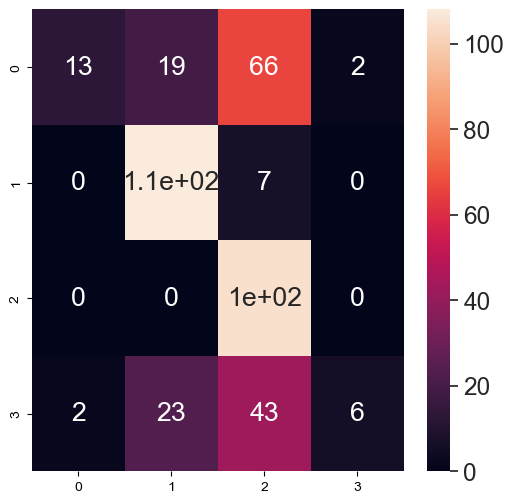

In [28]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(lables_test, test_prediction)
fig, ax = plt.subplots(figsize=(6,6))# Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)